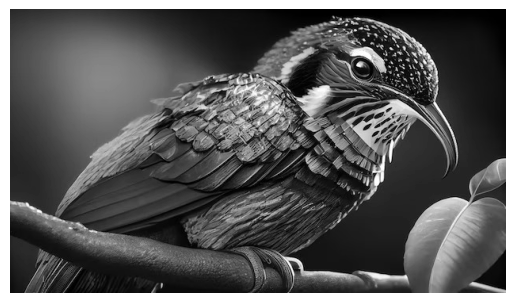

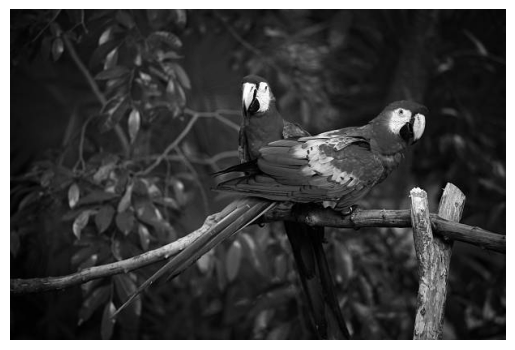

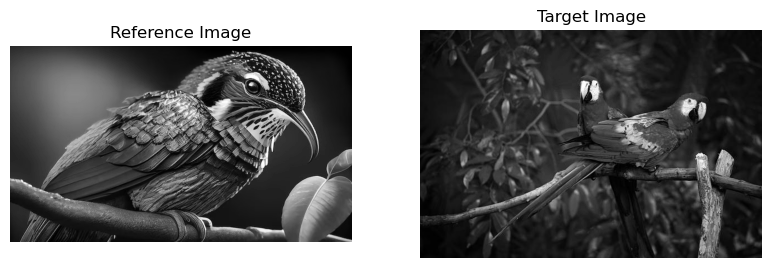

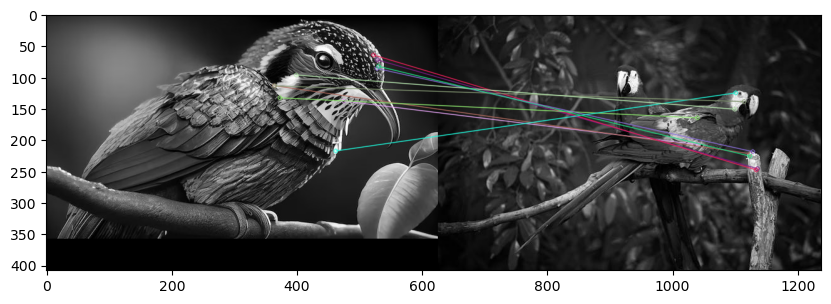

108

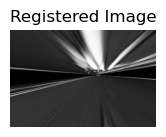

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('BirdImage.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image1, cmap = 'gray')
plt.axis('off')
plt.show()

image2 = cv2.imread('BirdImage1.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image2, cmap = 'gray')
plt.axis('off')
plt.show()

# Load images
img1 = cv2.imread('BirdImage.jpg', cv2.IMREAD_GRAYSCALE)  # Reference image
img2 = cv2.imread('BirdImage1.jpg', cv2.IMREAD_GRAYSCALE)   # Target image

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Extract location of good matches
points1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)


# Find homography matrix using RANSAC
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)


# Use homography to warp the reference image to align with the target image
height, width = img2.shape
registered_img = cv2.warpPerspective(img1, H, (width, height))

# Display the original images and the registered image side by side
plt.figure(figsize=(15, 5))

# Reference Image
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

# Target Image
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Target Image')
plt.axis('off')

# Draw the first 10 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


# Show the matches
plt.figure(figsize=(10, 5))
plt.imshow(img3)
plt.show()

# Registered Image
plt.subplot(1, 3, 3)
plt.imshow(registered_img, cmap='gray')
plt.title('Registered Image')
plt.axis('off')

#  number of matches found
len(matches)